# Impact of Covid-19 Pandemic on Business Operations Companies

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib notebook

## Data Prep

### data1
Percentage of Companies Requested Financial Assistance

In [229]:
df1 = pd.read_excel(r'/Users/summerxu/Downloads/table1a.xlsx',skiprows=6,skipfooter=2)
df1.head()

,NAICS code,Industry,Paycheck Protection Program (PPP),Main Street Lending Program,Corporate Credit Facilities (CCFs),Municipal Liquidity Facility (MLF),Economic Injury Disaster Loans (EIDL),Small Business Administration (SBA) Loan Forgiveness,Deferral of Federal Employment Tax Deposits and Payments,Federal Sick and Family Leave Tax Credits,Federal Employee Retention Tax Credit,Other Federal programs,State or local government programs,"All other sources (banks, owners, family and friends, etc.)",Company did not request or receive any financial assistance
0,NaN,Total1,61.69,2.30,1.68,1.56,21.57,21.03,2.95,5.54,4.05,3.54,8.43,4.37,31.87
1,113-115,"Forestry, fishing, and agricultural services",47.16,2.65,0.26,0.24,6.48,12.17,0.45,3.57,2.67,6.10,3.33,0.24,41.19
2,21,Mining,70.18,4.83,0.87,0.85,12.22,11.33,3.91,5.38,2.50,1.17,1.03,1.35,26.33
3,22,Utilities,35.20,2.26,2.26,2.29,5.32,8.56,5.71,16.44,2.81,2.91,2.65,2.55,57.81
4,23,Construction,57.05,1.31,1.11,0.65,16.16,18.42,1.92,4.24,2.48,1.98,3.79,2.96,37.79


In [230]:
df1.rename(columns = {
    "Paycheck Protection Program (PPP)":"PPP",
    'Main Street Lending Program': 'MS_Lending_Program',
    'Corporate Credit Facilities (CCFs)':'CCFs',
    'Municipal Liquidity Facility (MLF)':'MLF',
    'Economic Injury Disaster Loans (EIDL)':'EIDL',
    'Small Business Administration (SBA) Loan Forgiveness':'SBA',
    'Deferral of Federal Employment Tax Deposits and Payments':'FED_ETD',
    'Federal Sick and Family Leave Tax Credits':'FED_SFLTC',
    'Federal Employee Retention Tax Credit':'FED_ERTC',
    'Other Federal programs':'FED_Other',
    'State or local government programs':'State_Local_Program',
    'All other sources (banks, owners, family and friends, etc.)':'All_Other',
    'Company did not request or receive any financial assistance':'No_Assistance'
}, inplace = True)

In [231]:
df1.drop(axis = 0, index = [0,21], inplace = True)

In [232]:
df1['Industry'] = df1['Industry'].replace({'\w*services':'',
                                          '\w*industries':''},regex = True).str.rstrip()

In [234]:
df1.head()

,NAICS code,Industry,Paycheck Protection Program (PPP),MS_Lending_Program,Corporate Credit Facilities (CCFs),MLF,Economic Injury Disaster Loans (EIDL),Small Business Administration (SBA) Loan Forgiveness,Deferral of Federal Employment Tax Deposits and Payments,Federal Sick and Family Leave Tax Credits,FED_ERTC,Other Federal programs,State or local government programs,"All other sources (banks, owners, family and friends, etc.)",No_Assistance
1,113-115,"Forestry, fishing, and agricultural",47.16,2.65,0.26,0.24,6.48,12.17,0.45,3.57,2.67,6.10,3.33,0.24,41.19
2,21,Mining,70.18,4.83,0.87,0.85,12.22,11.33,3.91,5.38,2.50,1.17,1.03,1.35,26.33
3,22,Utilities,35.20,2.26,2.26,2.29,5.32,8.56,5.71,16.44,2.81,2.91,2.65,2.55,57.81
4,23,Construction,57.05,1.31,1.11,0.65,16.16,18.42,1.92,4.24,2.48,1.98,3.79,2.96,37.79
5,31-33,Manufacturing,69.29,1.68,1.20,1.20,21.23,24.37,4.09,11.61,4.24,1.66,8.05,4.21,24.32


### data2
Percentage of Companies Impact on Payroll

In [122]:
df2 = pd.read_excel(r'/Users/summerxu/Downloads/table3a.xlsx',skiprows=6,skipfooter=2)
df2.head()

,NAICS code,Industry,Reduced Hours/ Benefits/Pay,Increased Hours/ Benefits/Pay,No Change to Hours/ Benefits/Pay,Other Impact
0,NaN,Total1,39.23,5.87,54.66,0.24
1,113-115,"Forestry, fishing, and agricultural services",25.40,1.2,73.40,0
2,21,Mining,50.06,2.98,46.96,0
3,22,Utilities,10.77,1.88,87.36,0
4,23,Construction,37.58,6.92,55.49,0.01


In [125]:
df2.rename(columns = {'Reduced Hours/ Benefits/Pay':'reduced_pay',
                      'Increased Hours/ Benefits/Pay':'increased_pay',
                      'No Change to Hours/ Benefits/Pay':'no_change',
                      'Other Impact':'other_impact'
    
}, inplace = True)
df2.head()

,NAICS code,Industry,reduced_pay,increased_pay,no_change,other_impact
0,NaN,Total1,39.23,5.87,54.66,0.24
1,113-115,"Forestry, fishing, and agricultural services",25.40,1.2,73.40,0
2,21,Mining,50.06,2.98,46.96,0
3,22,Utilities,10.77,1.88,87.36,0
4,23,Construction,37.58,6.92,55.49,0.01


In [269]:
df2.drop(axis = 0, index = 0, inplace = True)

In [270]:
df2['Industry'] = df2['Industry'].replace({'\w*services':'',
                                          '\w*industries':''},regex = True).str.rstrip()

In [271]:
df2.head()

,NAICS code,Industry,reduced_pay,increased_pay,no_change,other_impact
1,113-115,"Forestry, fishing, and agricultural",25.40,1.2,73.40,0
2,21,Mining,50.06,2.98,46.96,0
3,22,Utilities,10.77,1.88,87.36,0
4,23,Construction,37.58,6.92,55.49,0.01
5,31-33,Manufacturing,39.19,5.07,55.40,0.34


### Merge Dataset

In [273]:
df3 = df1.merge(df2, how ='inner', on = 'NAICS code')

In [274]:
df3.head()

,NAICS code,Industry_x,Paycheck Protection Program (PPP),MS_Lending_Program,Corporate Credit Facilities (CCFs),MLF,Economic Injury Disaster Loans (EIDL),Small Business Administration (SBA) Loan Forgiveness,Deferral of Federal Employment Tax Deposits and Payments,Federal Sick and Family Leave Tax Credits,FED_ERTC,Other Federal programs,State or local government programs,"All other sources (banks, owners, family and friends, etc.)",No_Assistance,Industry_y,reduced_pay,increased_pay,no_change,other_impact
0,113-115,"Forestry, fishing, and agricultural",47.16,2.65,0.26,0.24,6.48,12.17,0.45,3.57,2.67,6.10,3.33,0.24,41.19,"Forestry, fishing, and agricultural",25.40,1.2,73.40,0
1,21,Mining,70.18,4.83,0.87,0.85,12.22,11.33,3.91,5.38,2.50,1.17,1.03,1.35,26.33,Mining,50.06,2.98,46.96,0
2,22,Utilities,35.20,2.26,2.26,2.29,5.32,8.56,5.71,16.44,2.81,2.91,2.65,2.55,57.81,Utilities,10.77,1.88,87.36,0
3,23,Construction,57.05,1.31,1.11,0.65,16.16,18.42,1.92,4.24,2.48,1.98,3.79,2.96,37.79,Construction,37.58,6.92,55.49,0.01
4,31-33,Manufacturing,69.29,1.68,1.20,1.20,21.23,24.37,4.09,11.61,4.24,1.66,8.05,4.21,24.32,Manufacturing,39.19,5.07,55.40,0.34


## Plotting

<IPython.core.display.Javascript object>


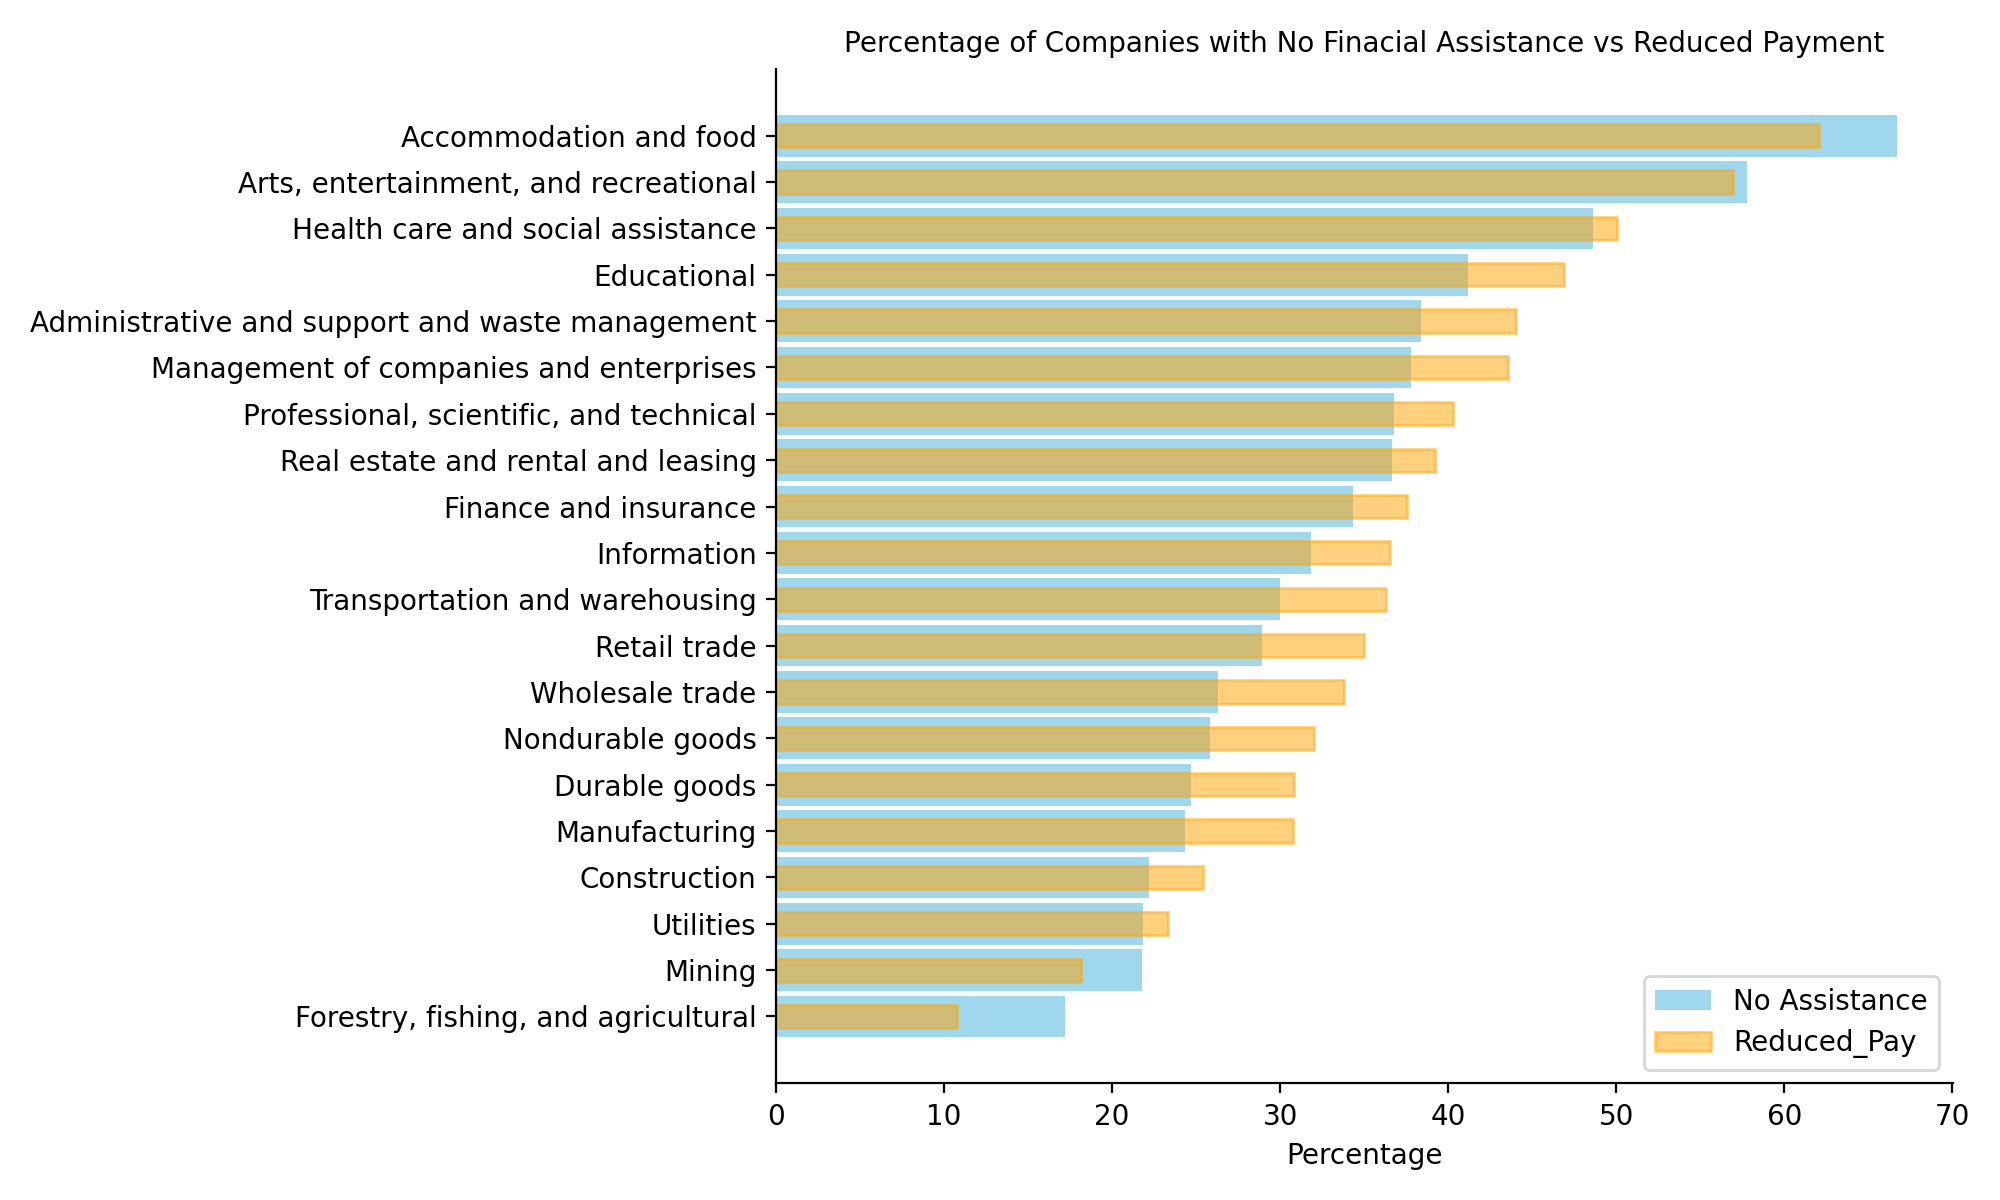

In [383]:
plt.figure(figsize = (10,6))

plt.barh(df3.Industry_x, df3.No_Assistance.sort_values(ascending=True),
         color='skyblue',alpha = 0.8,height = 0.9,
         label = 'No Assistance')

plt.barh(df3.Industry_x, df3.reduced_pay.sort_values(ascending=True),
         color='orange',alpha=0.5,height = 0.5,edgecolor = "orange",
         label = 'Reduced_Pay')

plt.title('Percentage of Companies with No Finacial Assistance vs Reduced Payment', fontsize = 10)
plt.xlabel('Percentage')
plt.tight_layout()
plt.legend()

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

## Insights
- Most companies in accommodation and food industry did not request financial assistance during pandemic, at the same time, these companies are also the largest group who reduced the payroll during the pandemic.

- Most companies from Fishing, Agricultural and Mining received financial Assistance and not many of them reduced employee payroll.